In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
def plot_stuff(df):
    _, axs = plt.subplots(2, 1, figsize=(8, 5))
    
    # Plotting rates
    for _, column in enumerate(['RateRoll', 'RatePitch', 'RateYaw']):
        axs[0].plot(df['Timestamp'], df[column], label=column)

    axs[0].set_title('Angular Velocities')
    axs[0].set_xlabel('Timestamp')
    axs[0].set_ylabel('Velocity (deg/s)')
    axs[0].set_ylim(-100, 100)
    axs[0].legend()
    
    # Plotting accelerations
    for _, column in enumerate(['AccForward']):
        axs[1].plot(df['Timestamp'], df[column], label=column)

    axs[1].set_title('Linear Acceleration')
    axs[1].set_xlabel('Timestamp')
    axs[1].set_ylabel('Acceleration (m/s^2)')
    axs[1].legend()
    
    plt.tight_layout()
    plt.show() 

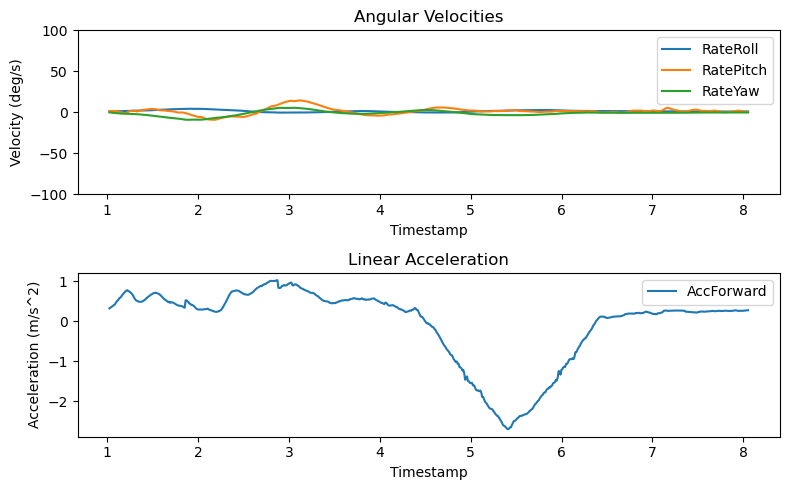

In [27]:
data_filepath = 'data-fast-brake.csv'
columns = ['Timestamp', 'RateRoll', 'RatePitch', 'RateYaw', 'AccX', 'AccY', 'AccZ']

df = pd.read_csv(data_filepath, names=columns, header=None)
df['Timestamp'] -= df['Timestamp'][0]

# Smooth out all columns
for column in columns[1:]:
    df[column] = df[column].rolling(window=100).mean()
df = df.dropna()

pitch = 54 # degrees
# df['AccY'] = (df['AccY'] + 9.81 * np.sin(pitch * np.pi / 180))
# df['AccZ'] = (df['AccZ'] + 9.81 * np.cos(pitch * np.pi / 180))
df['AccForward'] = df['AccY'] * np.cos(pitch * np.pi / 180) - df['AccZ'] * np.sin(pitch * np.pi / 180)

plot_stuff(df)